# Runge-Kutta Methods

The aforementioned Euler's method is the simplest single step ODE solving method, but has a fairly large error. The Runge-Kutta methods are more popular due to their improved accuracy, in particular 4th and 5th order methods.

## Outline of the Derivation

The idea behind Runge-Kutta is to perform integration steps using a weighted average of Euler-like steps. The following outline {% cite efferson-numerical-methods %} is not a full derivation of the method, as this requires theorems outside the scope of this course.

### Second Order Runge-Kutta

We shall start by looking at second order Runge-Kutta methods. We want to solve an ODE of the form

$$
\frac{dy}{dx} = f(x, y)
$$

on the interval $[x_i, x_{i+1}]$, where $x_{i+1} = x_i + h$, with a given initial condition $y(x = x_i) = y_i$. That is we wish to determine the value of $y(x_{i+1}) = y_{i+1}$. We start by calculating the gradient of $y$ at 2 places:

- The start of the interval: $(x_i, y_i)$
- A point inside the interval, for which we approximate the $y$ value using Euler's method: $(x_i + \alpha h, y_i + \alpha h f(x_i, y_i))$, for some choice of $\alpha$.

<!--- Not necessarily inside the interval though... --->
We then approximate the value of $y_{i+1}$ using Euler's method with each of these gradients:

- $y_{i+1} \approx y_i + h f(x_i, y_i)$
- $y_{i+1} \approx y_i + h f(x_i + \alpha h, y_i + \alpha h f(x_i, y_i))$

The final approximation of $y_{i+1}$ is calculated by taking a weighted average of these two approximations:

$$
y_{i+1} \approx y_i + c_1 h f(x_i, y_i) + c_2 h f(x_i + \alpha h, y_i + \alpha h f(x_i, y_i) )
$$

where $c_1 + c_2 = 1$ is required.

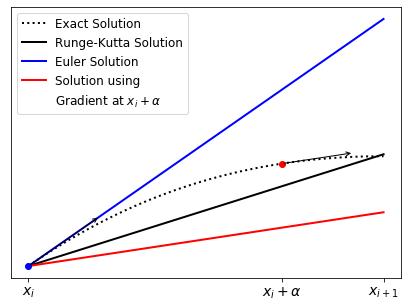

In [24]:
import numpy as np
import matplotlib.pyplot as plt

##Functions
def fprime(a, x, y):
    return 3*a[0]*x*x + 2*a[1]*x + a[2]

def f(a,x):
    return a[0]*x*x*x + a[1]*x*x + a[2]*x + a[3]

def sp_to_cubic(sp_xy):
    X = np.zeros((4,4))
    Y = np.zeros((4,1))
    
    X[::2,0] = 3*sp_xy[:,0]**2
    X[::2,1] = 2*sp_xy[:,0]
    X[::2,2] = 1
    
    X[1::2,0] = sp_xy[:,0]**3
    X[1::2,1] = sp_xy[:,0]**2
    X[1::2,2] = sp_xy[:,0]
    X[1::2,3] = 1
    
    Y[1::2,0] = sp_xy[:,1]
    
    X = np.matrix(X)
    Y = np.matrix(Y)
    return np.array(X.I*Y).flatten()

def rk2_single(f, y0, x0, h, c1):
    c2 = 1- c1
    ah = h*0.5/c2
    
    x_rk = [x0, x0+h]
    x_between = x0 + ah
    y_between = y0 + ah*f(x0, y0) #don't actually need this
    
    m_euler = f(x0, y0)
    m_between = f(x_between, y_between)
    
    y_euler = y0 + h*m_euler
    y_between_end = y0 + h*m_between
    
    y_rk = [y0, y0 + h*c1*m_euler + h*c2*m_between]
    
    return x_rk, y_rk, m_euler, m_between, x_between, y_between, y_euler, y_between_end
    

def rk2(f,y0, xlims, h, c1): #symbolic_ticks = true
    c2 = 1- c1
    ah = h*0.5/c2
    
    x_rk = np.arange(xlims[0], xlims[1] + h, h)
    y_rk = np.zeros(x_rk.size)
    y_rk[0] = y0
    
    x_between = x_rk[:-1] + ah
    y_between = np.zeros(x_between.size)
#    y_euler = np.zeros(x_between.size)
    
#    m_between = np.zeros(x_between.size)
#    m_euler = np.zeros(y_euler.size)
#    
    x_ticks = [r'$x_0$']
    y_ticks = [r'$y_0$']
    x_between_ticks = [r'$x_0 + \alpha h$']
    y_between_ticks = [r'$y_0 + \alpha h f(x_0, y_0)$']
    for i in range(x_rk.size-1):
        #RK2
#        m_between[i] = ah*f(x_rk[i], y_rk[i]
        y_between[i] = y_rk[i] + ah*f(x_rk[i], y_rk[i])
        y_rk[i+1] = y_rk[i] + h*(c1*f(x_rk[i], y_rk[i]) + 
                                c2*f(x_between[i], y_between[i]))
        
        #ticks
        x_ticks.append(r'$x_{{}}$'.format(i+1))
        y_ticks.append(r'$y_{{}}$'.format(i+1))
        
        x_between_ticks.append(r'$x_{{}} + \alpha h$'.format(i))
        y_between_ticks.append(r'$y_{{}} + \alpha h f(x_{{}}, y_{{}})$'.format(i))
        
    return x_rk, y_rk, x_between, y_between, [x_ticks, y_ticks, x_between_ticks,
                                              y_between_ticks]

##plotting
#params
legend_fontsize = 12
tick_fontsize = 14
linewidth = 2

#xlims = [0, 1]
x0 = 0
h = 0.5
c1 = 0.3

a = sp_to_cubic(np.array([[0.5, 2], [1.5, -1]]))

N = 100

arrow_dx = 0.1
#set-up
ff = lambda x,y: fprime(a, x, y)

x = np.linspace(x0, x0+h, N)
y = f(a, x)

x_rk, y_rk, m_euler, m_between, x_between, y_between, y_euler_end, y_between_end = rk2_single(ff, y[0], x0, h, c1)

#plotting:
fig, ax = plt.subplots(figsize = (7, 5))

ax.plot(x, y, ls = ':', color = 'black', linewidth = linewidth, label = 'Exact Solution')
ax.plot(x_rk, y_rk, color = 'black', linewidth = linewidth, 
         label = 'Runge-Kutta Solution')
ax.plot(x_rk, [y_rk[0], y_euler_end], color = 'blue', linewidth = linewidth, 
         label = 'Euler Solution')
ax.plot(x_rk, [y_rk[0], y_between_end], color = 'red', linewidth = linewidth,
         label = r'Solution using')
ax.plot([], [], ls = 'none', label = r'Gradient at $x_i + \alpha$')


arrow_width = 0.01*linewidth

#ax.arrow(x_between, f(a, x_between), arrow_dx, arrow_dx*m_between, color = 'red',
#          width = arrow_width, head_width = 0.05, head_length = 0.05)
ax.plot(x_between, f(a, x_between), 'ro')

ax.annotate("", xy=(x_between + arrow_dx, f(a, x_between) + arrow_dx*m_between), 
            xytext=(x_between, f(a, x_between)), 
            arrowprops=dict(arrowstyle="->"))

ax.plot(x0,f(a, x0), 'bo')

ax.annotate("", xy=(x0 + arrow_dx, f(a, x0) + arrow_dx*m_euler), 
            xytext=(x0, f(a, x0)), 
            arrowprops=dict(arrowstyle="->"))


ax.set_xticks([x_rk[0], x_between, x_rk[1]])
ax.set_xticklabels([r'$x_i$', r'$x_i + \alpha$', r'$x_{i+1}$'], fontsize = tick_fontsize)
ax.set_yticks([])
ax.legend(fontsize = legend_fontsize)

plt.show()

Now, how do we go about choosing good values for $c_1$, $c_2$ and $\alpha$? If we Taylor expand the left-hand side of the equation above, and the last term on the right-hand side gives us the relation:

$$
\alpha = \frac{1}{2 c_2}
$$

This still gives us a free choice of one of the parameters. Two popular choices are:

**The trapezoid rule:** $c1 = c2 = \tfrac{1}{2}$ and $\alpha = 1$, which yields:

$$
y_{i+1} = y_i + \tfrac{1}{2} h \left[ f(x_i, y_i) + f(x_i + h, y_i + h f(x_i, y_i)) \right]
$$

**The midpoint rule:** $c1 = 0$, $c2 = 1$ and $\alpha = \tfrac{1}{2}$, which yields:

$$
y_{i+1} = y_i + hf\left(x_i + \tfrac{1}{2} h, y_i + \tfrac{1}{2} h f(x_i, y_i) \right)
$$

Both of these methods have an accumulated error of $\mathcal(h^2)$, as opposed to Euler's method with $\mathcal(h)$

## Fourth Order Runge-Kutta (RK4)

As mentioned, the more popular Runge-Kutta method is the fourth order (for which we will not cover the derivation):

$$
y_{i+1} = y_i + \tfrac{h}{6} (k_1 + 2 k_2 + 2 k_3 + k_4)
$$

where the $k$ values are the slopes:

$$
\begin{align*}
k_1 &= f(x_i, y_i)\\
k_2 &= f\left(x_i + \tfrac{1}{2}h, y_i + \tfrac{1}{2}\right)\\
k_3 &= f\left(x_i + \tfrac{2}{2}h, y_i + \tfrac{1}{2}\right)\\
k_4 &= f(x_i + h, y_i + k_3)
\end{align*}
$$

This method has an accumulated error of $\mathcal(h^4)$

### Worked Example

### High Order ODEs